In [11]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement ML Algorithms
import sklearn
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier


# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to record time
import time

# Module to save and load Python objects to and from files
import pickle 

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

%matplotlib inline

In [6]:
fetal_df = pd.read_csv('fetal_health.csv')
fetal_df.head()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
# Select input and output features
X = fetal_df.drop(columns = ['fetal_health'])
y = fetal_df['fetal_health']
X.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],
      dtype='object')

In [12]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
# Defining prediction model
dt_clf = DecisionTreeClassifier(random_state = 0)
rf_clf = RandomForestClassifier(random_state = 0)
ada_clf = AdaBoostClassifier(random_state=0)
voting_clf = VotingClassifier(estimators=[('dt', dt_clf), ('rf', rf_clf), ('ada', ada_clf)], voting='soft')


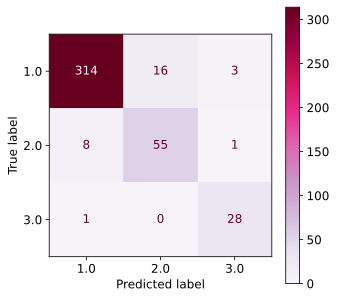

In [28]:
voting_clf.fit(train_X, train_y)
y_pred = voting_clf.predict(test_X)
# Predictions on test set
y_pred = voting_clf.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = voting_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = voting_clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax)

# Save as SVG
plt.savefig("confusion_mat_voting.svg", bbox_inches = 'tight');

# Generate classification report
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df

# Save the report as a CSV File
report_df.to_csv('class_report_voting.csv') 

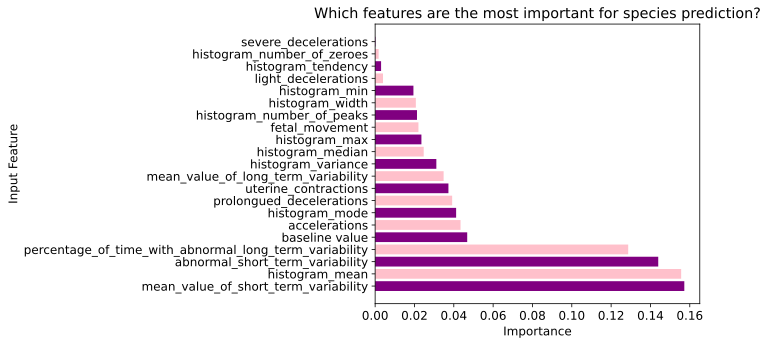

In [31]:
importance_dt = dt_clf.feature_importances_
importance_rf = rf_clf.feature_importances_
importance_ada = ada_clf.feature_importances_
importances = (importance_dt + importance_rf + importance_ada) / 3
# Storing feature importance as a dataframe

feature_imp = pd.DataFrame(list(zip(train_X.columns, importances)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize = (10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for species prediction?') 
plt.tight_layout()
plt.savefig("feature_imp_voting.svg");

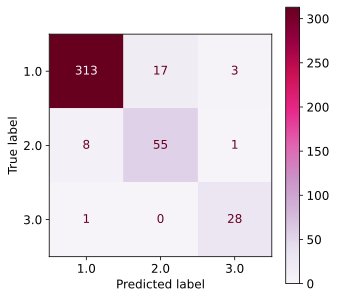

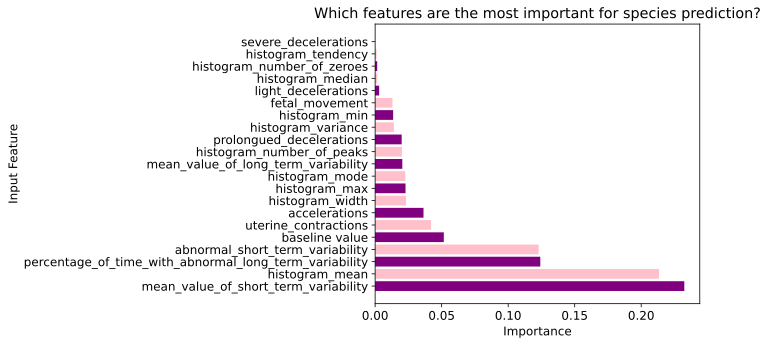

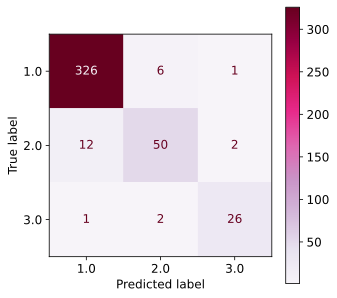

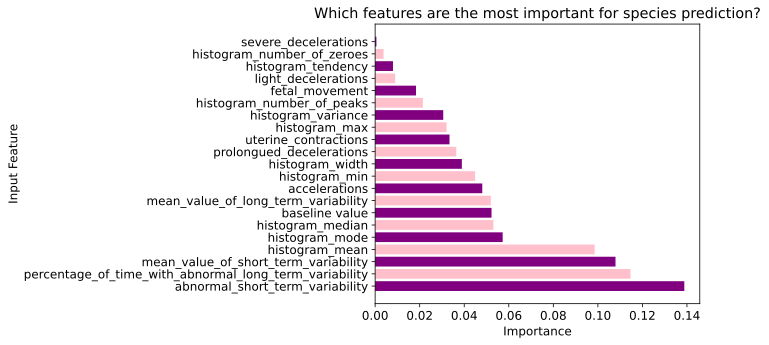

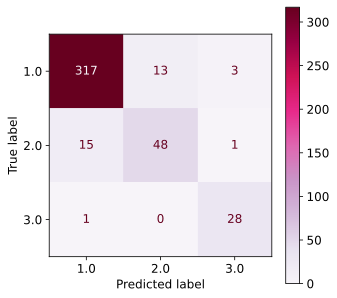

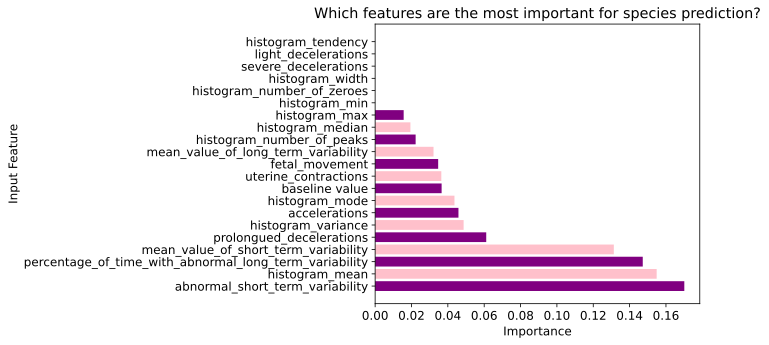

In [27]:
names = {dt_clf:'dt', rf_clf:'rf', ada_clf:'ada'}
for clf in (dt_clf, rf_clf, ada_clf):
    clf.fit(train_X, train_y)
    y_pred = clf.predict(test_X)

    # Now generate confusion matrix
    cm = confusion_matrix(test_y, y_pred, labels = clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
    # Specify figure size
    fig, ax = plt.subplots(figsize = (5, 5))
    plt.rcParams.update({'font.size': 12})
    # Display Confusion Matrix
    disp.plot(cmap = 'PuRd', ax = ax)
    # Save as SVG
    plt.savefig("confusion_mat_" + names[clf] + ".svg", bbox_inches = 'tight');

    # Generate classification report
    report = classification_report(test_y, y_pred, output_dict = True)
    report_df = pd.DataFrame(report)
    report_df
    # Save the report as a CSV File
    report_df.to_csv("class_report_" + names[clf] + ".csv") 

    # Storing importance values from the trained model
    importance = clf.feature_importances_
    # Storing feature importance as a dataframe
    feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
                columns = ['Feature', 'Importance'])
    feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)
    # Bar plot
    plt.figure(figsize = (10, 5))
    plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['purple', 'pink'])
    plt.xlabel("Importance")
    plt.ylabel("Input Feature")
    plt.title('Which features are the most important for species prediction?') 
    plt.tight_layout()
    plt.savefig("feature_imp_" + names[clf] + ".svg");

In [20]:
dt_pickle = open('dt_clf.pickle', 'wb') 
rf_pickle = open('rf_clf.pickle', 'wb')
ada_pickle = open('ada_clf.pickle', 'wb')
voting_pickle = open('voting_clf.pickle', 'wb')

# Write DT model to the file
pickle.dump(dt_clf, dt_pickle) 
pickle.dump(rf_clf, rf_pickle) 
pickle.dump(ada_clf, ada_pickle) 
pickle.dump(voting_clf, voting_pickle)

# Close the file
dt_pickle.close() 
rf_pickle.close()
ada_pickle.close()
voting_pickle.close()

In [22]:
user_df = pd.read_csv('fetal_health_user.csv')

In [23]:
dt_clf.predict(user_df)

array([1., 2., 2., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.])

In [ ]:
user_df['prediction'] = dt_clf.predict(user_df)
user_df


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,prediction
0,123,0.004,0.000,0.005,0.005,0,0.000,24,1.3,0,2.1,56,92,148,3,0,121,123,125,7,0,1.0
1,123,0.000,0.000,0.005,0.004,0,0.000,47,1.1,31,7.4,130,59,189,14,2,129,122,127,15,0,2.0
2,123,0.000,0.000,0.005,0.005,0,0.000,50,0.8,32,3.1,94,75,169,7,0,125,122,126,8,0,2.0
3,123,0.000,0.000,0.005,0.006,0,0.000,45,1.0,19,3.8,85,59,144,8,1,124,119,125,14,1,1.0
4,123,0.006,0.000,0.006,0.004,0,0.000,33,1.3,0,4.7,138,61,199,9,1,135,122,127,39,0,1.0
5,138,0.000,0.009,0.002,0.002,0,0.000,60,0.5,9,8.7,47,103,150,3,0,144,140,144,4,1,2.0
6,141,0.000,0.017,0.002,0.002,0,0.000,60,0.4,41,5.6,38,121,159,3,0,154,149,154,8,1,2.0
7,141,0.005,0.023,0.002,0.001,0,0.000,53,1.0,28,5.2,123,57,180,13,0,154,149,154,10,1,2.0
8,141,0.001,0.020,0.001,0.001,0,0.000,59,0.5,38,6.1,38,121,159,3,0,154,149,154,8,1,2.0
9,129,0.000,0.001,0.006,0.009,0,0.001,65,2.8,0,0.0,101,50,151,7,2,105,88,112,13,0,3.0


In [26]:
user_df['prediction'].dtypes

dtype('float64')